burma14_NNHonly

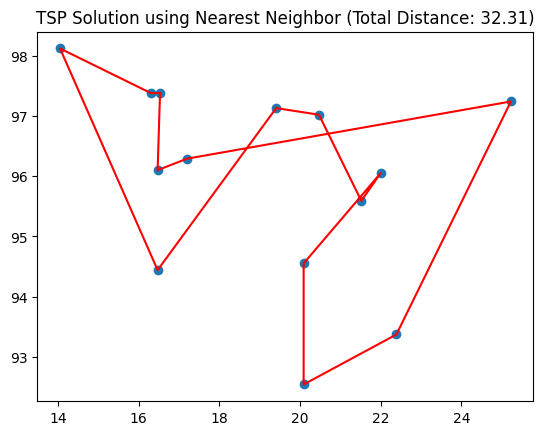

Time taken to render: 0.14500212669372559 seconds




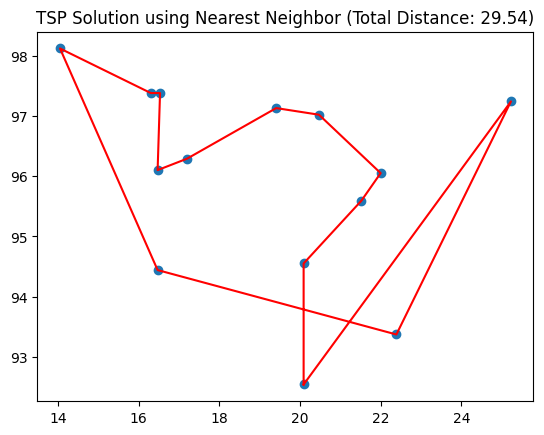

Time taken to render: 0.1459980010986328 seconds




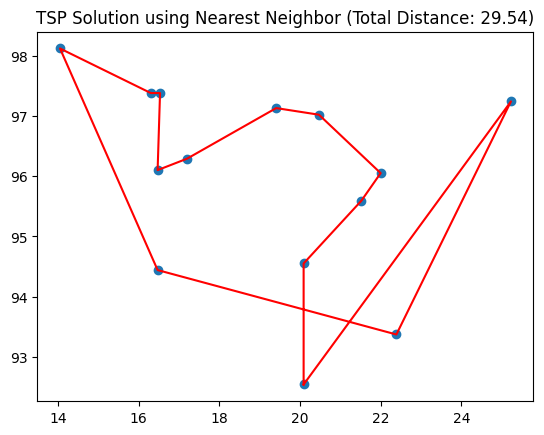

Time taken to render: 0.1320028305053711 seconds




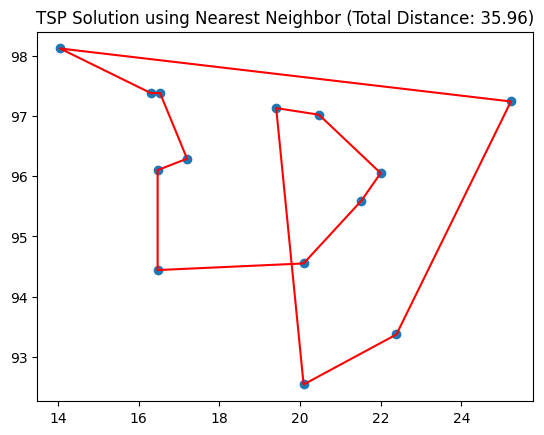

Time taken to render: 0.13575983047485352 seconds




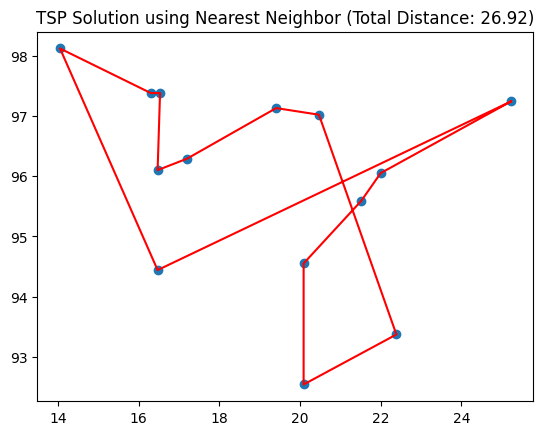

Time taken to render: 0.1466505527496338 seconds




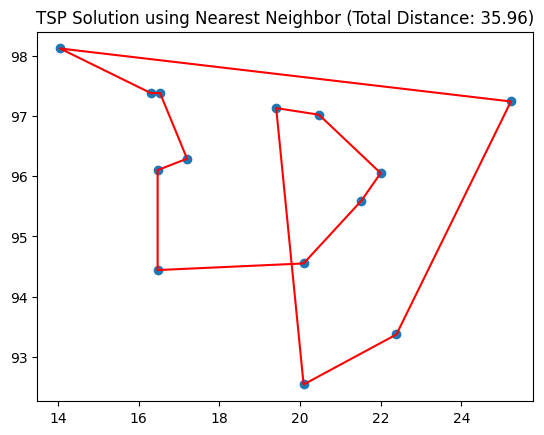

Time taken to render: 0.14899945259094238 seconds




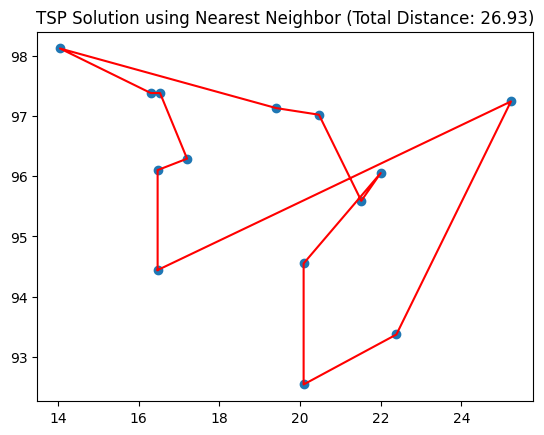

Time taken to render: 0.1510004997253418 seconds




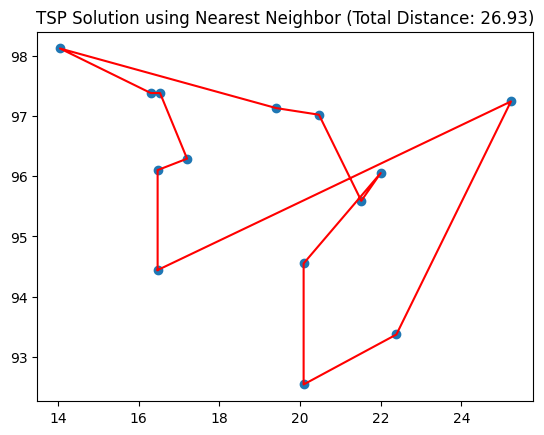

Time taken to render: 0.16203522682189941 seconds




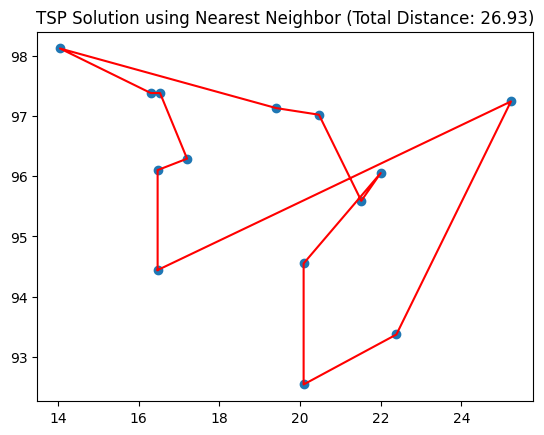

Time taken to render: 0.17200231552124023 seconds




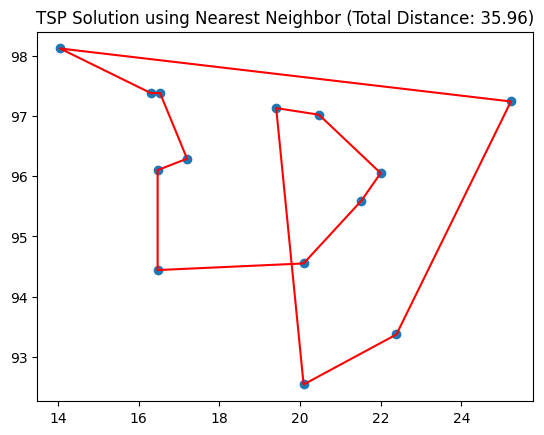

Time taken to render: 0.17300629615783691 seconds


Average Tour Length: 30.697797258157323
Average Time taken to render: 0.15124571323394775 seconds


In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def solve(self):
        self.nearest_neighbor()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "burma14.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(10):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)
    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


burma14_NNHwith2OPT


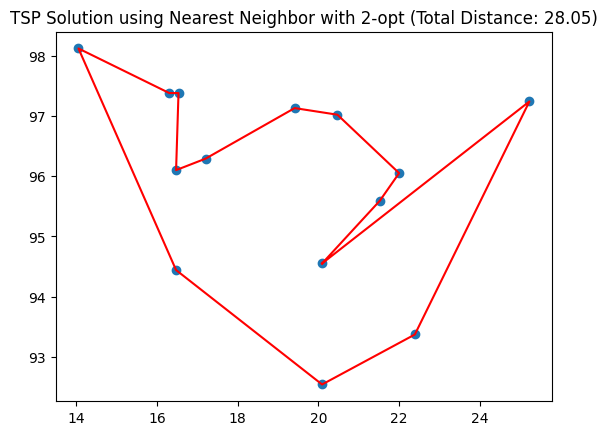

Time taken to render: 0.19599628448486328 seconds


Iteration 10: Improved total distance to 28.19


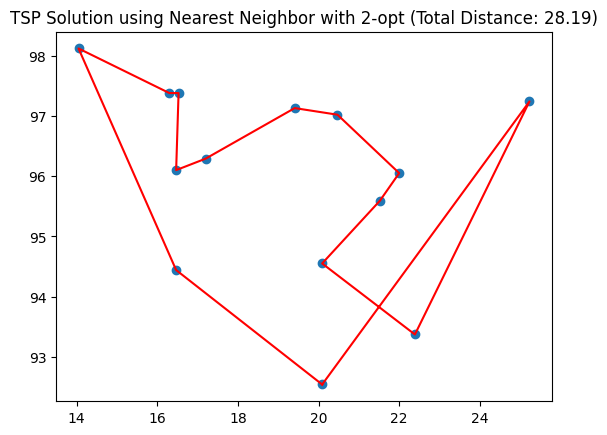

Time taken to render: 0.15000534057617188 seconds


Iteration 54: Improved total distance to 24.84


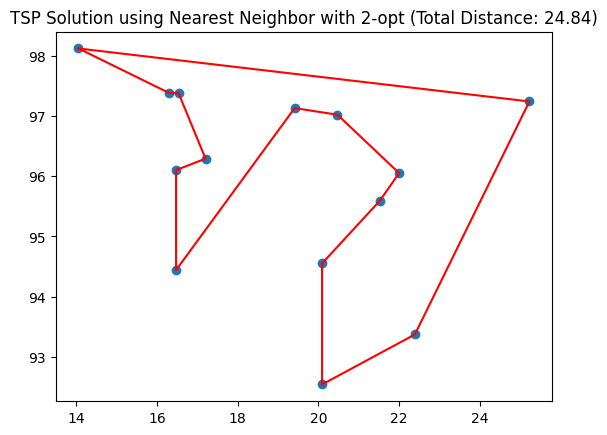

Time taken to render: 0.13999104499816895 seconds


Iteration 10: Improved total distance to 28.19


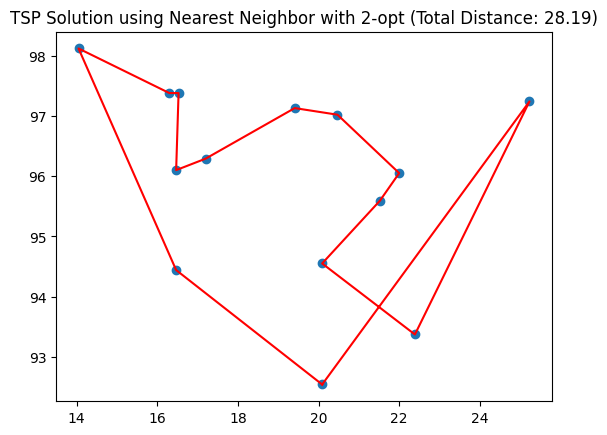

Time taken to render: 0.12403225898742676 seconds




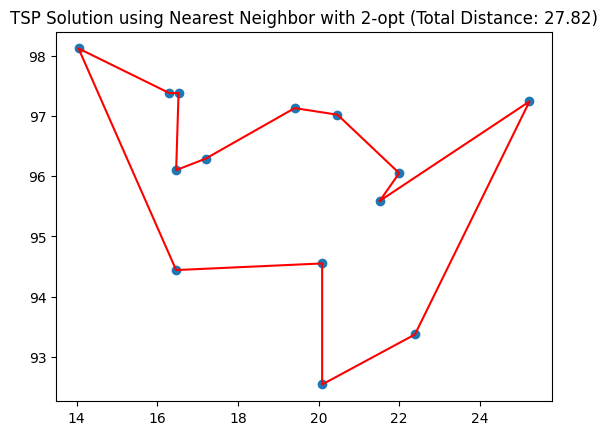

Time taken to render: 0.1179656982421875 seconds


Average Tour Length: 27.417177173047218
Average Time taken to render: 0.14559812545776368 seconds


In [5]:
import re
import numpy as np
import matplotlib.pyplot as plt
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def two_opt_swap(self, tour, i, k):
        new_tour = tour[:i] + tour[i:k + 1][::-1] + tour[k + 1:]
        return new_tour

    def two_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(1, self.n - 2):
                for k in range(i + 1, self.n):
                    iteration += 1
                    if k - i == 1:
                        continue  # Changes nothing, skip
                    new_tour = self.two_opt_swap(tour, i, k)
                    if self.total_distance(new_tour) < self.total_distance(tour):
                        tour = new_tour
                        improvement = True
                        print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.two_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "burma14.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Store total distances
total_distances = []
render_times = []

# Rerun TSP solving process 5 times
for i in range(5):
    start_time = time.time()  # Start timing for this run
    # Create TSPSolver instance and solve
    solver = TSPSolver(city_coordinates)
    solver.solve()

    # Calculate total distance and add to list
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution
    plt.figure()
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 2-opt (Total Distance: {total_distance:.2f})')
    plt.show()

    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")


burma14_NNHwith3OPT

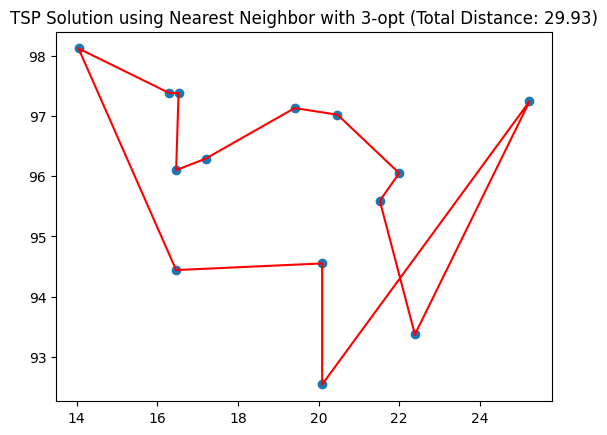

Time taken to render: 0.2069869041442871 seconds


Iteration 55: Improved total distance to 29.22
Iteration 59: Improved total distance to 28.23


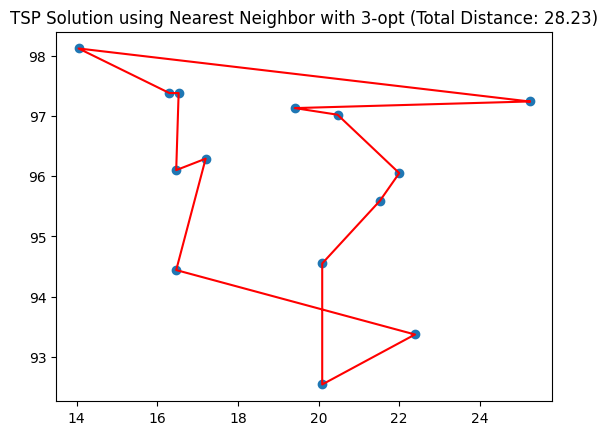

Time taken to render: 0.26000022888183594 seconds


Iteration 63: Improved total distance to 27.47


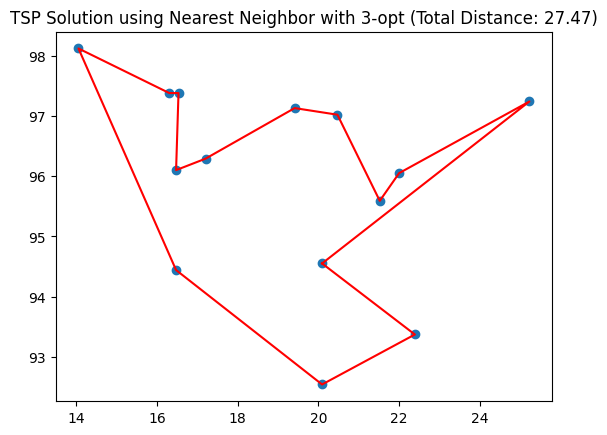

Time taken to render: 0.20199966430664062 seconds


Average Tour Length: 28.539956795111895
Average Time taken to render: 0.22299559911092123 seconds


In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import time

class TSPSolver:
    def __init__(self, points):
        self.points = np.array(points)
        self.n = len(points)
        self.tour = None

    def nearest_neighbor(self, start=None):
        if start is None:
            start = np.random.randint(0, self.n)
        unvisited = set(range(self.n))
        unvisited.remove(start)
        tour = [start]

        while unvisited:
            current_city = tour[-1]
            nearest_city = min(unvisited, key=lambda city: np.linalg.norm(self.points[current_city] - self.points[city]))
            tour.append(nearest_city)
            unvisited.remove(nearest_city)

        self.tour = tour

    def total_distance(self, tour=None):
        if tour is None:
            tour = self.tour
        return sum(np.linalg.norm(self.points[tour[i]] - self.points[tour[i + 1]]) for i in range(self.n - 1))

    def three_opt_swap(self, tour, i, j, k):
        new_tour = tour[:i] + tour[j:k+1][::-1] + tour[i:j] + tour[k+1:]
        return new_tour

    def three_opt(self, tour=None):
        if tour is None:
            tour = self.tour

        improvement = True
        iteration = 0
        while improvement:
            improvement = False
            for i in range(self.n - 4):
                for j in range(i + 2, self.n - 2):
                    for k in range(j + 2, self.n):
                        iteration += 1
                        if random.random() < 0.1:  # Adjust this probability as needed
                            new_tour = self.three_opt_swap(tour, i, j, k)
                            if self.total_distance(new_tour) < self.total_distance(tour):
                                tour = new_tour
                                improvement = True
                                print(f"Iteration {iteration}: Improved total distance to {self.total_distance(tour):.2f}")

        self.tour = tour

    def solve(self):
        self.nearest_neighbor()
        self.three_opt()
        # Connect the last city back to the starting city to form a closed tour
        self.tour.append(self.tour[0])

# Parse the TSP dataset and extract coordinates
def parse_tsp_dataset(data):
    coordinates = []
    pattern = re.compile(r'\s*(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')

    in_node_coord_section = False
    for line in data.split('\n'):
        if line.startswith("NODE_COORD_SECTION"):
            in_node_coord_section = True
            continue
        if line.startswith("EOF"):
            break
        if in_node_coord_section:
            match = pattern.match(line)
            if match:
                coordinates.append((float(match.group(2)), float(match.group(3))))

    return coordinates

# Load the TSP dataset from a file
def load_tsp_file(file_path):
    with open(file_path, 'r') as file:
        tsp_data = file.read()
    return tsp_data

# Specify the path to your TSP file
tsp_file_path = "burma14.tsp"

# Load the TSP dataset from the file
tsp_data = load_tsp_file(tsp_file_path)

# Parse the dataset and extract coordinates
city_coordinates = parse_tsp_dataset(tsp_data)

# Create TSPSolver instance and solve using nearest neighbor
total_distances = []
render_times = []

for i in range(3):
    start_time = time.time()  # Start timing for this run
    solver = TSPSolver(city_coordinates)
    solver.solve()
    total_distance = solver.total_distance()
    total_distances.append(total_distance)

    # Plot the solution for each run
    plt.scatter(solver.points[:, 0], solver.points[:, 1])
    tour_points = np.array([solver.points[i] for i in solver.tour])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-')
    plt.title(f'TSP Solution using Nearest Neighbor with 3-opt (Total Distance: {total_distance:.2f})')
    plt.show()
    
    end_time = time.time()  # End timing for this run
    rendered_time = end_time - start_time  # Calculate render time for this run
    render_times.append(rendered_time)
    print("Time taken to render:", rendered_time, "seconds\n\n")

# Calculate and print average tour length and average time taken to render
average_tour_length = np.mean(total_distances)
average_render_time = np.mean(render_times)
print("Average Tour Length:", average_tour_length)
print("Average Time taken to render:", average_render_time, "seconds")
